The baseline ridge regression model created had a very large error value and an inefficient r2 score. In this section we will use other models to attempt to achieve a better model.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost 
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [6]:
data = pd.read_csv('./data/data_4hr.csv')

model = XGBRegressor()

In [22]:
data.Date = data.Date.apply(lambda x: pd.to_datetime(x))

data = data.set_index('Date')

In [11]:
# set up a model evaluation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)



In [23]:
# split data into training testing X and y


train = data[:6000]
test = data[6000:]

X_train = train.drop('Close', axis=1)
X_test = test.drop('Close', axis=1)
y_train = train.Close
y_test = test.Close

In [21]:
X_train.dtypes

Date           object
Volume        float64
7day_MA       float64
50day_MA      float64
200day_MA     float64
Close_-1      float64
Volume_-1     float64
Close_-2      float64
Volume_-2     float64
Close_-3      float64
Volume_-3     float64
Close_-4      float64
Volume_-4     float64
Close_-5      float64
Volume_-5     float64
Close_-6      float64
Volume_-6     float64
Close_-7      float64
Volume_-7     float64
Close_-8      float64
Volume_-8     float64
Close_-9      float64
Volume_-9     float64
Close_-10     float64
Volume_-10    float64
Close_-11     float64
Volume_-11    float64
Close_-12     float64
Volume_-12    float64
Close_-13     float64
Volume_-13    float64
Close_-14     float64
Volume_-14    float64
Close_-15     float64
Volume_-15    float64
Close_-16     float64
Volume_-16    float64
Close_-17     float64
Volume_-17    float64
Close_-18     float64
Volume_-18    float64
Close_-19     float64
Volume_-19    float64
Close_-20     float64
Volume_-20    float64
Close_-21 

In [24]:
model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [25]:
scores

array([-158.90267613, -176.86153083, -169.24120576, -150.53081491,
       -154.14468984, -172.05726778, -194.04160763, -154.59705326,
       -176.78845278, -171.75214179, -173.65461879, -171.2487034 ,
       -158.3936077 , -158.82634752, -179.3670834 , -164.05955821,
       -154.72191123, -176.20319693, -157.14703276, -173.60783219,
       -198.37992196, -155.74466671, -144.43946196, -156.05814484,
       -153.28310423, -175.15645772, -149.09252745, -160.7597114 ,
       -159.45009072, -194.62055971])

In [26]:
scores = abs(scores)
print(f'Mean MAE: {scores.mean()}')

Mean MAE: 166.43773265104167


In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'The r2 score for xgboost is: {r2}')
print(f'The MSE for xgboost is: {mse}')

The r2 score for xgboost is: 0.9184726006568993
The MSE for xgboost is: 8621869.239743669


This is actually not an improvement on the baseline model. The r2 score is lower, and the MSE is higher. Now will try with scaled data. This time trying MinMaxScaler as well as StandardScaler.

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [33]:
X_train_scaled.tail()

Volume   7day_MA  50day_MA  200day_MA  Close_-1  \
Date                                                                     
2021-04-08 16:00:00  0.002576  0.990963  0.998569   0.994130  0.914663   
2021-04-08 20:00:00  0.002376  0.990717  0.998986   0.995613  0.933459   
2021-04-09 00:00:00  0.002927  0.989823  0.999294   0.997064  0.940353   
2021-04-09 04:00:00  0.003021  0.988676  0.999609   0.998518  0.923204   
2021-04-09 08:00:00  0.041037  0.988117  1.000000   1.000000  0.925810   

                     Volume_-1  Close_-2  Volume_-2  Close_-3  Volume_-3  ...  \
Date                                                                      ...   
2021-04-08 16:00:00   0.006139  0.922895   0.006713  0.912914   0.014474  ...   
2021-04-08 20:00:00   0.002576  0.914663   0.006139  0.922895   0.006713  ...   
2021-04-09 00:00:00   0.002376  0.933459   0.002576  0.914663   0.006139  ...   
2021-04-09 04:00:00   0.002927  0.940353   0.002376  0.933459   0.002576  ...   
2021-04-09 08:00:00   0.003021  0.923204   0.002927  0.940353   0.002376  ...   

                     Close_-20  Volume_-20  Close_-21  Volume_-21  Close_-22  \
Date                                                                           
2021-04-08 16:00:00   0.923341    0.007218   0.927525    0.008083   0.937764   
2021-04-08 20:00:00   0.925433    0.014042   0.923341    0.007218   0.927525   
2021-04-09 00:00:00   0.950935    0.041162   0.925433    0.014042   0.923341   
2021-04-09 04:00:00   0.957760    0.009754   0.950935    0.041162   0.925433   
2021-04-09 08:00:00   0.957537    0.006869   0.957760    0.009754   0.950935   

                     Volume_-22  Close_-23  Volume_-23  Close_-24  Volume_-24  
Date                                                                           
2021-04-08 16:00:00    0.007853   0.923221    0.000000   0.941588    0.014372  
2021-04-08 20:00:00    0.008083   0.937764    0.007853   0.923221    0.000000  
2021-04-09 00:00:00    0.007218   0.927525    0.008083   0.937764    0.007853  
2021-04-09 04:00:00    0.014042   0.923341    0.007218   0.927525    0.008083  
2021-04-09 08:00:00    0.041162   0.925433    0.014042   0.923341    0.007218  

[5 rows x 52 columns]

In [34]:
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [35]:
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
scores=cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores = abs(scores)

print(f'Mean MAE: {scores.mean()}')
print(f'The r2 score for xgboost is: {r2}')
print(f'The MSE for xgboost is: {mse}')

Mean MAE: 166.44018770203994
The r2 score for xgboost is: -2.138460426594787
The MSE for xgboost is: 331905538.8769776


Scaled data again produces worse results. Need to consult with mentor for improvement suggestions. Perhaps scaling the entire dataframe at once is causing the problem, as the scaler is being fit on both volume and close columns.

I am encouraged by the relatively low mean absolute error. I want to explore how close predictions are to actual price. I am going to take the model fitted on the unscaled data and again predict results. After this I will plot the results to visualize how accurate the model is.

Also, I am going to be using mean absolute error moving forward, as this may be a better metric for determining whether or not to make an investment or not since we are looking to establish the type of position to take. Wondering whether it may be more beneficial to establish a loop to label the data with a 0 if price went down from previous close or a 1 if price went up from previous close. 

In [38]:
from sklearn.metrics import mean_absolute_error


model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'The r2 score for xgboost is: {r2}')
print(f'The MAE for xgboost is: {mae}')

The r2 score for xgboost is: 0.9184726006568993
The MSE for xgboost is: 2295.7345506934034


In [40]:
y_ = y_test.reset_index()
y_.head()

Date    Close
0 2021-04-09 12:00:00  58724.0
1 2021-04-09 16:00:00  58395.0
2 2021-04-09 20:00:00  58263.0
3 2021-04-10 00:00:00  58346.0
4 2021-04-10 04:00:00  58500.0

In [41]:
y_pred

array([58162.176, 58593.86 , 58287.4  , 57988.414, 57245.574, 58707.93 ,
       59343.348, 59492.69 , 59408.93 , 59571.582, 57112.67 , 59354.574,
       58096.03 , 58721.17 , 57715.99 , 59315.938, 59345.004, 59744.82 ,
       59472.22 , 59339.42 , 59789.34 , 59389.234, 58713.12 , 58785.59 ,
       59420.84 , 59363.855, 59454.57 , 59362.082, 59598.664, 59066.293,
       58690.957, 58592.875, 59393.004, 59461.805, 59226.434, 59288.715,
       59267.69 , 58758.793, 59139.29 , 59482.67 , 59138.973, 59442.617,
       58893.918, 58899.945, 59647.42 , 59415.36 , 59366.87 , 59457.848,
       59277.7  , 59511.703, 59466.902, 59685.188, 59178.04 , 57220.656,
       56053.652, 55689.266, 55334.273, 55148.21 , 56941.496, 57200.656,
       56688.33 , 56558.945, 55808.07 , 56218.38 , 57992.31 , 56599.395,
       55236.188, 56458.844, 56325.14 , 56467.37 , 56809.125, 56204.05 ,
       56109.797, 56001.625, 56133.77 , 55843.977, 54818.566, 54805.168,
       55312.89 , 55339.5  , 54654.773, 52685.02 , 

In [42]:
y_['pred_close'] = y_pred

In [43]:
y_.head()

Date    Close    pred_close
0 2021-04-09 12:00:00  58724.0  58162.175781
1 2021-04-09 16:00:00  58395.0  58593.859375
2 2021-04-09 20:00:00  58263.0  58287.398438
3 2021-04-10 00:00:00  58346.0  57988.414062
4 2021-04-10 04:00:00  58500.0  57245.574219

<ipython-input-46-3d38f90fbacc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


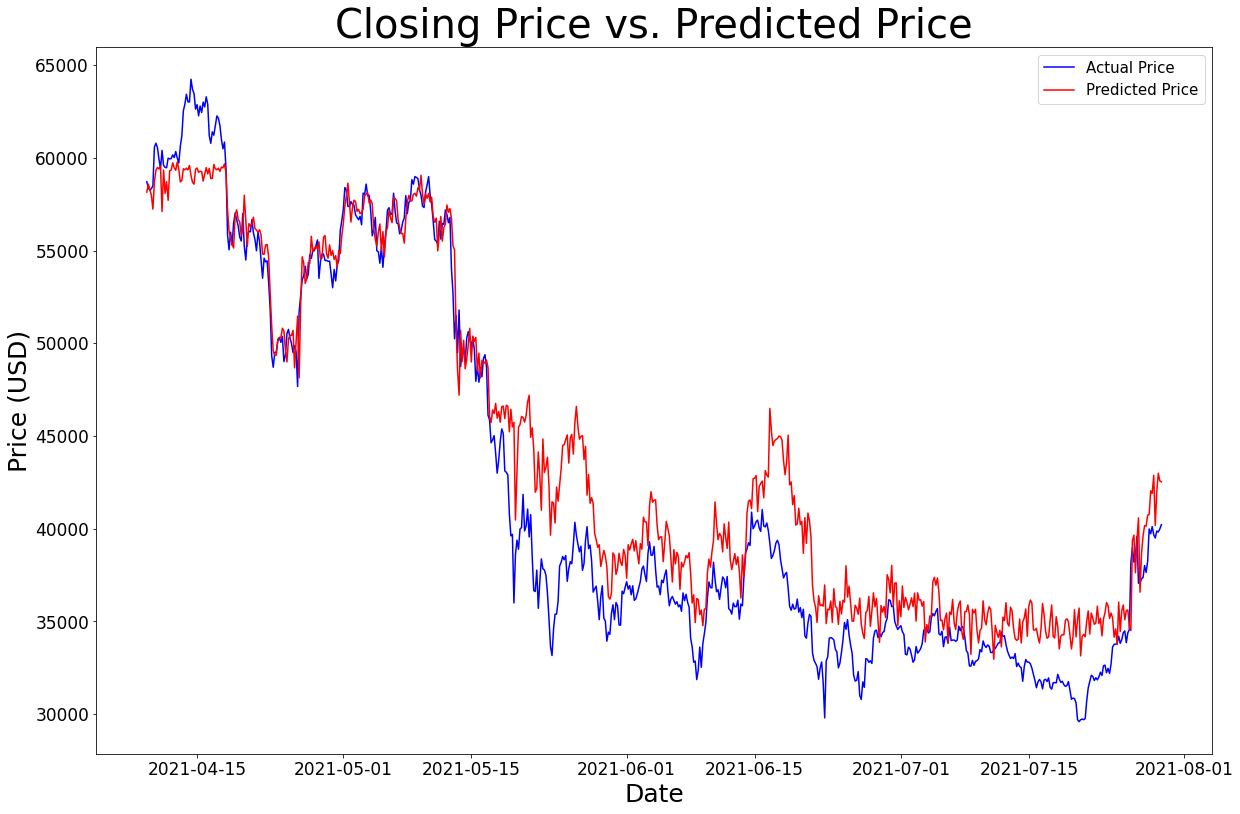

In [46]:
fig, ax = plt.subplots(figsize=(20,13))
ax.plot(y_.Date, y_.Close, color='blue', label='Actual Price')
ax.plot(y_.Date, y_.pred_close, color='red', label='Predicted Price')
ax.legend(loc='best', fontsize=15)
ax.set_title('Closing Price vs. Predicted Price', fontsize=40)
ax.set_ylabel('Price (USD)', fontsize=25)
ax.set_xlabel('Date', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=17)

fig.show()